In [1]:
import model as m 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
para = m.ModelParams(
    age_strucure=[0,4,10,16,20,35],
    B=11e-3,
    V=np.zeros([6]),
    d=[0,0,0,0,0,9.1e-3],
    gamma=(1.0/14.0*365.0*1e-3)*np.ones([6]),
    C=np.eye(6),
    N=1
)

In [3]:
beta=np.eye(6)*1.2

In [4]:
mdl = m.SIRVModel(para, lambda t: beta)

In [31]:
out, t = mdl.run(np.hstack([0.95*(1./6)*np.ones(6), 0.05*(1./6)*np.ones(6), np.zeros(6*2)]),5,method="RK45", eval_per_year=26)

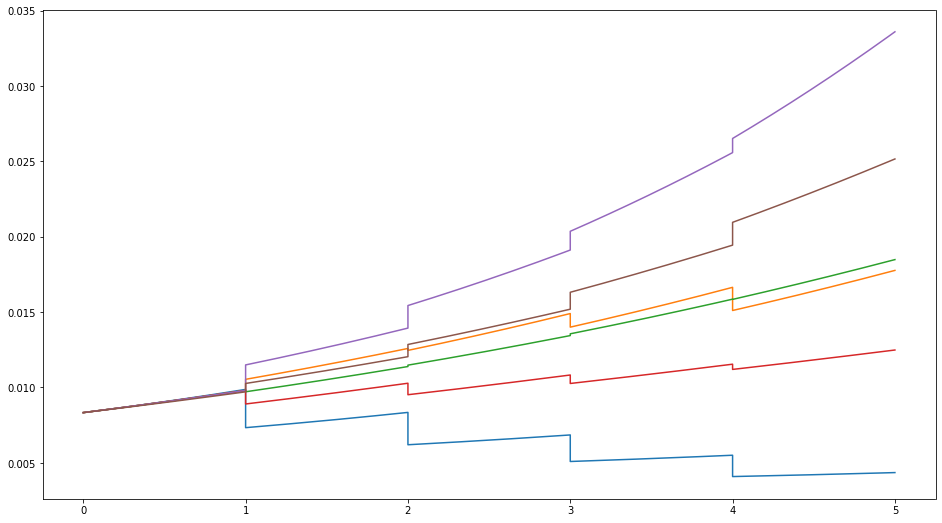

In [32]:
out[6:(6*2),:]
plt.figure(figsize=(16,9))
plt.plot(t, np.transpose(out[6:(6*2),:]))

In [33]:
print(t)

[0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52
 0.56 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.   1.04
 1.08 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6
 1.64 1.68 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.   2.   2.04 2.08 2.12
 2.16 2.2  2.24 2.28 2.32 2.36 2.4  2.44 2.48 2.52 2.56 2.6  2.64 2.68
 2.72 2.76 2.8  2.84 2.88 2.92 2.96 3.   3.   3.04 3.08 3.12 3.16 3.2
 3.24 3.28 3.32 3.36 3.4  3.44 3.48 3.52 3.56 3.6  3.64 3.68 3.72 3.76
 3.8  3.84 3.88 3.92 3.96 4.   4.   4.04 4.08 4.12 4.16 4.2  4.24 4.28
 4.32 4.36 4.4  4.44 4.48 4.52 4.56 4.6  4.64 4.68 4.72 4.76 4.8  4.84
 4.88 4.92 4.96 5.  ]
